# **Customer Churn**
In this code I have used Logistic Regression Model to Predict whether a Customer will Churn or Not.

In [67]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [4]:
df.shape

(10000, 12)

In [9]:
df.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#Data Processing
#Checking Missing Values
df.isnull().values.any()

True

In [7]:
df.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [11]:
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [12]:
#Checking Datatype of Missing Columns
df[["Gender", "Age", "EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [13]:
#Replcaing Missing Values with the columns mean
mean_value = df['EstimatedSalary'].mean() 
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(mean_value) 

In [15]:
#Replacing Missing Values with the Max Value of column
df['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].value_counts().idxmax()) 

In [17]:
#Replacing Missing Values with the mode of column
df['Age'].mode()
mode_value = df['Age'].mode()
df['Age'] = df['Age'].fillna(mode_value[0])

In [19]:
df.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [20]:
#Renaming the columns
df = df.rename(columns = {'CredRate': 'CreditScore', 'ActMem' : 'IsActiveMember',
                            'Prod Number' : 'NumOfProducts', 'Exited' : 'Churn'}) 
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [21]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [22]:
#Customer Id doesn't help to predict churn so we will remove it
df.drop(labels = ['CustomerId'], axis = 1, inplace = True)

In [24]:
column_churn = df['Churn']
df.drop(labels = ['Churn'], axis = 1, inplace = True)
df.insert(len(df.columns), 'Churn', column_churn.values)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [27]:
#Changing the Data type
df["Geography"] = df["Geography"].astype('category') 
df["Gender"] = df["Gender"].astype('category') 
df["HasCrCard"] = df["HasCrCard"].astype('category') 
df["Churn"] = df["Churn"].astype('category') 
df["IsActiveMember"] = df["IsActiveMember"].astype('category') 
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [28]:
#Performing EDA
df['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [32]:
df['IsActiveMember'].value_counts(0)

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [30]:
summary_churn = df.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [33]:
summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,653.0,36.0,5.0,92072.68,2.0,99645.04
1,646.0,45.0,5.0,109349.29,1.0,102460.84


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


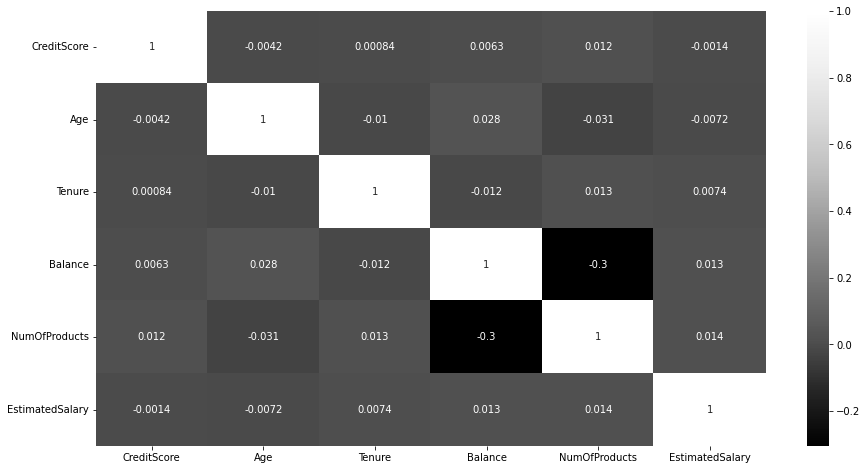

In [50]:
#Plotting Correlation Graph
corr = df.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True, cmap = 'Greys_r') 
corr

Text(0, 0.5, 'No of Customers')

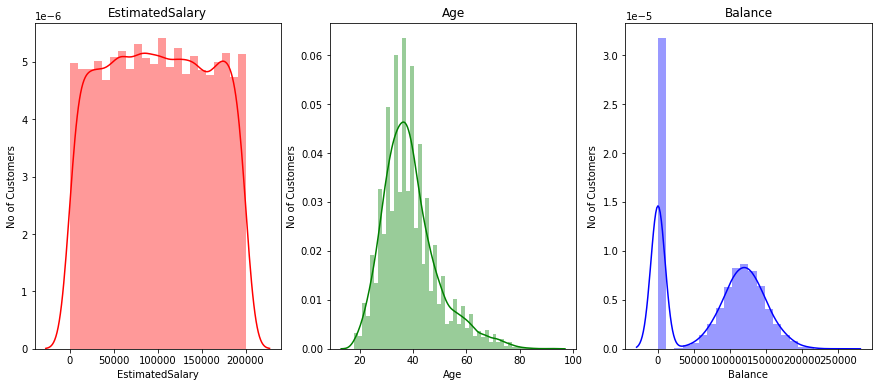

In [45]:
#Visualizing the Data
f, axes = plt.subplots(ncols = 3, figsize = (15, 6)) 

sns.distplot(df.EstimatedSalary, kde = True, color = "Red", ax = axes[0]).set_title('EstimatedSalary') 
axes[0].set_ylabel('No of Customers') 

sns.distplot(df.Age, kde = True, color = "Green", ax = axes[1]).set_title('Age') 
axes[1].set_ylabel('No of Customers') 

sns.distplot(df.Balance, kde = True, color = "Blue", ax = axes[2]).set_title('Balance') 
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

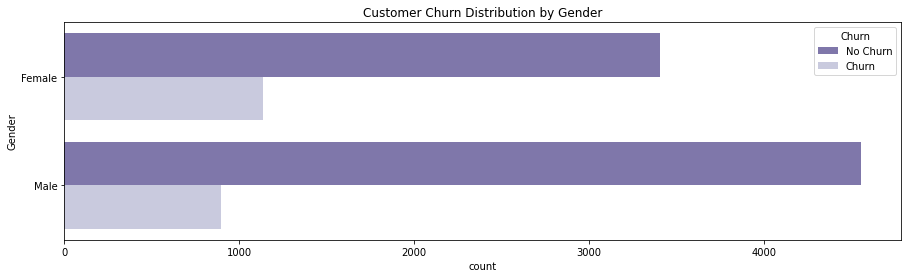

In [46]:
plt.figure(figsize = (15, 4)) 
p = sns.countplot(y = "Gender", hue = 'Churn', data = df, palette = "Purples_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

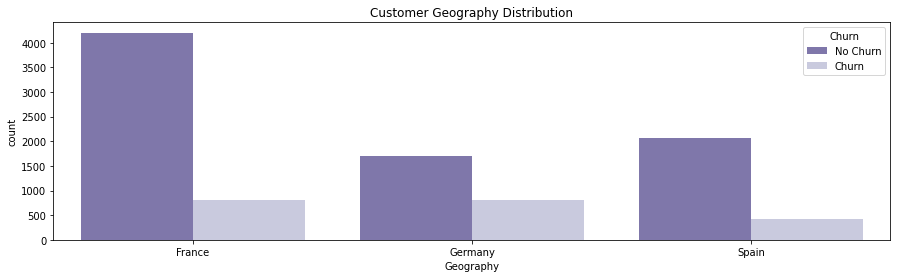

In [48]:
plt.figure(figsize = (15, 4)) 
p = sns.countplot(x = 'Geography', hue = 'Churn', data = df, palette = "Purples_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

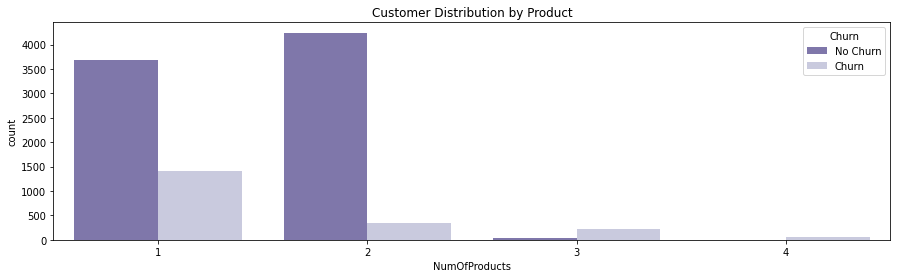

In [49]:
plt.figure(figsize = (15, 4)) 
p = sns.countplot(x = 'NumOfProducts', hue = 'Churn', data = df, palette = "Purples_r") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

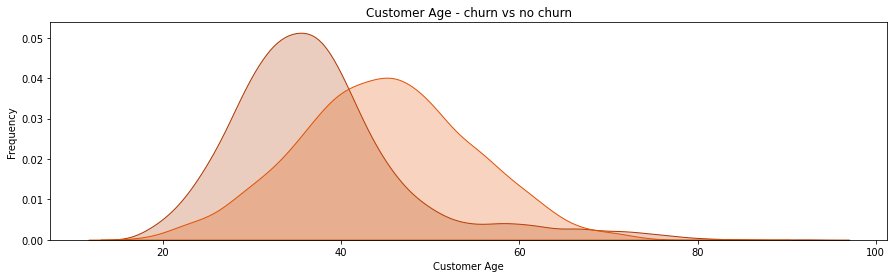

In [53]:
plt.figure(figsize = (15, 4)) 
ax = sns.kdeplot(df.loc[(df['Churn'] == 0), 'Age'], color = sns.color_palette("Oranges_r")[0], 
                 shade = True, label = 'no churn') 
ax = sns.kdeplot(df.loc[(df['Churn'] == 1), 'Age'] , color = sns.color_palette("Oranges_r")[1],
                 shade = True, label = 'churn') 
ax.set(xlabel = 'Customer Age', ylabel = 'Frequency') 
plt.title('Customer Age - churn vs no churn') 

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

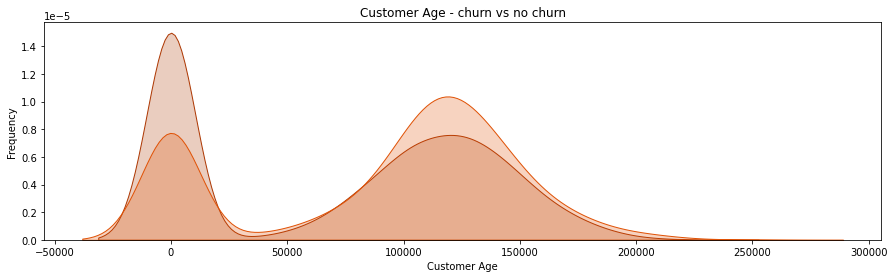

In [54]:
plt.figure(figsize = (15, 4)) 
ax = sns.kdeplot(df.loc[(df['Churn'] == 0), 'Balance'], color = sns.color_palette("Oranges_r")[0], 
                 shade = True, label = 'no churn') 
ax = sns.kdeplot(df.loc[(df['Churn'] == 1), 'Balance'] , color = sns.color_palette("Oranges_r")[1],
                 shade = True, label = 'churn') 
ax.set(xlabel = 'Customer Age', ylabel = 'Frequency') 
plt.title('Customer Age - churn vs no churn') 

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

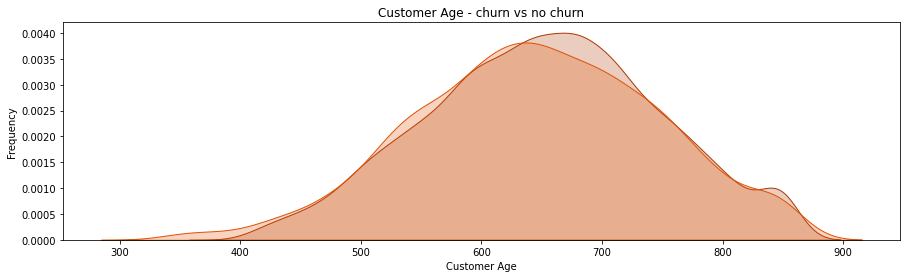

In [55]:
plt.figure(figsize = (15, 4)) 
ax = sns.kdeplot(df.loc[(df['Churn'] == 0), 'CreditScore'], color = sns.color_palette("Oranges_r")[0], 
                 shade = True, label = 'no churn') 
ax = sns.kdeplot(df.loc[(df['Churn'] == 1), 'CreditScore'] , color = sns.color_palette("Oranges_r")[1],
                 shade = True, label = 'churn') 
ax.set(xlabel = 'Customer Age', ylabel = 'Frequency') 
plt.title('Customer Age - churn vs no churn') 

Text(0.5, 1.0, 'Number of Product VS Balance')

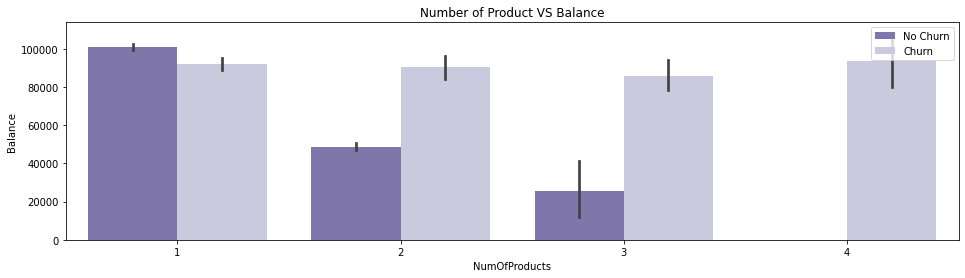

In [56]:
plt.figure(figsize = (16, 4)) 
p=sns.barplot(x = 'NumOfProducts', y = 'Balance', hue = 'Churn', data = df, palette = "Purples_r") 
p.legend(loc = 'upper right') 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Number of Product VS Balance') 

In [58]:
#Feature Selection
#Encoding Categorical Variables
df["Geography"] = df["Geography"].astype('category').cat.codes
df["Gender"] = df["Gender"].astype('category').cat.codes
df["HasCrCard"] = df["HasCrCard"].astype('category').cat.codes
df["Churn"] = df["Churn"].astype('category').cat.codes

In [59]:
#Defining Dependent and Independent Variables i.e. 'Y' and 'x' resp. & splitting the data for training and testing
y = df['Churn']
X = df.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 123, stratify = y) 

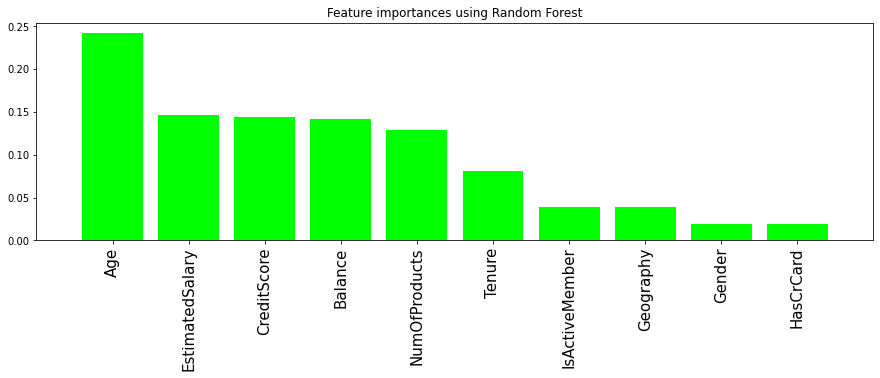

In [60]:
#Applying Model
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = df.drop(['Churn'], axis = 1).columns

indices = np.argsort(importances)[ :: -1]

plt.figure(figsize = (15, 4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices], color = "Lime", align = "center") 
plt.xticks(range(X_train.shape[1]), features[indices], rotation = 'vertical', fontsize = 15) 
plt.xlim([-1, X_train.shape[1]])
plt.show() 

In [61]:
feature_importance_df = pd.DataFrame({"Feature" : features, "Importance" : importances}) 
print(feature_importance_df)

           Feature  Importance
0      CreditScore    0.143886
1        Geography    0.038548
2           Gender    0.019299
3              Age    0.241954
4           Tenure    0.081503
5          Balance    0.141760
6    NumOfProducts    0.128461
7        HasCrCard    0.019139
8   IsActiveMember    0.038878
9  EstimatedSalary    0.146571


In [62]:
#Applying Model using Stats Model
top5_features = ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts'] 
logReg = sm.Logit(y_train, X_train[top5_features]) 
logistic_regression = logReg.fit() 

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [63]:
logistic_regression.summary
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [64]:
#Create function to compute coefficients
coef = logistic_regression.params
def y (coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts) : return coef[0] * Age + coef[1]\
                        * EstimatedSalary + coef[2] * CreditScore + coef[1] * Balance + coef[2] * NumOfProducts 

In [65]:
#A customer having below attributes
#Age: 50
#EstimatedSalary: 100,000 
#CreditScore: 600
#Balance: 100,000
#NumOfProducts: 2
#would have 38% chance of churn

y1 = y(coef, 50, 100000, 600, 100000, 2)
p = np.exp(y1) / (1 + np.exp(y1))
p

0.3823017864835242

In [68]:
#Applying Model using Scikit - Learn
clf = LogisticRegression(random_state = 0, solver = 'lbfgs').fit(X_train[top5_features], y_train) 

In [69]:
#Making Prediction
clf.predict(X_test[top5_features])
clf.predict_proba(X_test[top5_features])

array([[0.61565033, 0.38434967],
       [0.76717157, 0.23282843],
       [0.78137389, 0.21862611],
       ...,
       [0.552548  , 0.447452  ],
       [0.85311964, 0.14688036],
       [0.75851722, 0.24148278]])

In [70]:
clf.score(X_test[top5_features], y_test)

0.79

The Logistic Regression Model has an accuracy of 79%.